<a href="https://colab.research.google.com/github/purshottamkumarr/Deep-Learning-learning-project/blob/main/Copy_of_Face_Mask_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
#3 Configuring the Path of The Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Kaggle Api

In [ ]:
## Download The Data

!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:06<00:00, 31.8MB/s]
100% 163M/163M [00:06<00:00, 27.5MB/s]


In [ ]:
!ls

face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
##  Extracting The Compressed Data

from zipfile import ZipFile

dataset = ("/content/face-mask-dataset.zip")

with ZipFile(dataset,"r") as zip:

  zip.extractall()

print("The Datset Are Extracted :")



The Datset Are Extracted :


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Import The Dependeincies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
with_mask = os.listdir("/content/data/with_mask")
print(with_mask[0:5])
print(with_mask[-5:])

['with_mask_3541.jpg', 'with_mask_3418.jpg', 'with_mask_1229.jpg', 'with_mask_2828.jpg', 'with_mask_1048.jpg']
['with_mask_3539.jpg', 'with_mask_1146.jpg', 'with_mask_3151.jpg', 'with_mask_928.jpg', 'with_mask_285.jpg']


In [ ]:
without_mask = os.listdir("/content/data/without_mask")
print(without_mask[0:5])
print(without_mask[-5:])

['without_mask_576.jpg', 'without_mask_841.jpg', 'without_mask_3355.jpg', 'without_mask_844.jpg', 'without_mask_3727.jpg']
['without_mask_2799.jpg', 'without_mask_355.jpg', 'without_mask_3639.jpg', 'without_mask_2579.jpg', 'without_mask_3828.jpg']


In [ ]:
print("The Number of With Mask:",len(with_mask))
print("The Number of Without Mask:",len(without_mask))


The Number of With Mask: 3725
The Number of Without Mask: 3828


Creating the Labels for the two class of Images

With Mask = 1
without mask = 0

In [ ]:
## Create The Labels

with_mask = [1]*3725

without_mask = [0]*3828

print(with_mask[0:5])
print(without_mask[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask))
print(len(without_mask))

3725
3828


In [ ]:
label = with_mask + without_mask

print(len(label))

print(label[0:5])
print(label[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying The Image

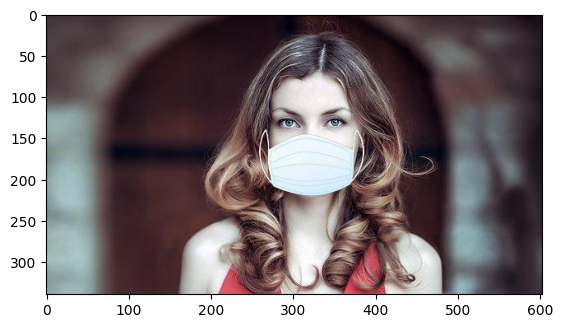

In [ ]:
img = mpimg.imread("/content/data/with_mask/with_mask_1048.jpg")
imgplot = plt.imshow(img)
plt.show()

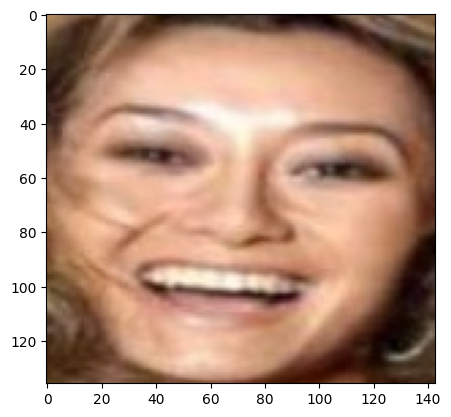

In [ ]:
img = mpimg.imread("/content/data/without_mask/without_mask_3828.jpg")
imgplot = plt.imshow(img)
plt.show()

Images Processing

1 : Resizing the Images
2 : Convert the Images to Numpy Array

In [ ]:
with_mask = "/content/data/with_mask/"

data = []

for img in os.listdir(with_mask):
  image = Image.open(os.path.join(with_mask, img))
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

without_mask = "/content/data/without_mask/"


for img in os.listdir(without_mask):
  image = Image.open(os.path.join(without_mask, img))
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 71,  72,   3],
        [ 81,  83,   9],
        [ 89,  87,   6],
        ...,
        [175, 205, 234],
        [173, 203, 233],
        [170, 201, 232]],

       [[ 73,  73,   3],
        [ 76,  76,   4],
        [ 86,  83,   3],
        ...,
        [171, 204, 236],
        [170, 202, 235],
        [167, 200, 233]],

       [[ 80,  79,   5],
        [ 77,  74,   0],
        [ 86,  82,   3],
        ...,
        [161, 200, 234],
        [157, 196, 233],
        [154, 195, 232]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
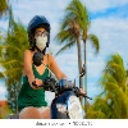

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
## converting the image list and label list to Numpy arrays

x = np.array(data)
y = np.array(label)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
## scaling the Data

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
print(x_train_scaled)

[[[[0.98823529 0.98823529 0.99607843]
   [0.99215686 0.99215686 0.99215686]
   [0.99607843 0.99607843 0.99215686]
   ...
   [0.99607843 0.99607843 0.99607843]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]]

  [[0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.98039216 0.98039216 0.98039216]
   ...
   [0.98431373 0.98431373 0.98431373]
   [0.98823529 0.98823529 0.98823529]
   [0.99215686 0.99215686 0.99215686]]

  [[0.99607843 0.99607843 0.99215686]
   [0.99607843 0.99607843 0.99607843]
   [0.77254902 0.77254902 0.77647059]
   ...
   [0.91764706 0.91764706 0.91764706]
   [1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]]

  ...

  [[0.99215686 0.99607843 0.98039216]
   [1.         1.         1.        ]
   [0.68627451 0.69019608 0.76470588]
   ...
   [0.8745098  0.8627451  0.90196078]
   [1.         1.         1.        ]
   [0.99215686 0.99607843 0.98431373]]

  [[0.99215686 0.99607843 0.98039216]
   [1. 

In [ ]:
print(x_test_scaled)

[[[[0.59607843 0.59215686 0.78823529]
   [0.44705882 0.44705882 0.62745098]
   [0.33333333 0.3254902  0.49019608]
   ...
   [0.67058824 0.62352941 0.87058824]
   [0.67058824 0.62745098 0.88235294]
   [0.67843137 0.63137255 0.89019608]]

  [[0.45098039 0.44313725 0.61176471]
   [0.30196078 0.29803922 0.45490196]
   [0.21960784 0.21568627 0.36078431]
   ...
   [0.6627451  0.61568627 0.85882353]
   [0.6627451  0.61960784 0.87058824]
   [0.66666667 0.62352941 0.87843137]]

  [[0.2627451  0.25490196 0.4       ]
   [0.19215686 0.18431373 0.32156863]
   [0.16862745 0.15686275 0.28627451]
   ...
   [0.65098039 0.60784314 0.83921569]
   [0.65490196 0.61568627 0.85490196]
   [0.65882353 0.61568627 0.86666667]]

  ...

  [[0.48235294 0.01176471 0.09019608]
   [0.44313725 0.00392157 0.07058824]
   [0.42352941 0.01176471 0.08235294]
   ...
   [0.51764706 0.18431373 0.27843137]
   [0.55686275 0.2627451  0.36078431]
   [0.55686275 0.29019608 0.39607843]]

  [[0.48627451 0.00784314 0.08235294]
   [0.4

Building a Convolutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
no_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size = (3,3),activation = "relu",input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64,kernel_size = (3,3),activation = "relu"))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = "relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation = "relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_classes,activation = "sigmoid"))

In [ ]:
## Compile the Nural Network

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["acc"])

In [ ]:
history = model.fit(x_train_scaled,y_train,validation_split= 0.1,epochs = 4)

Epoch 1/4
170/170 [==============================] - 139s 803ms/step - loss: 0.5159 - acc: 0.7624 - val_loss: 0.2414 - val_acc: 0.9041
Epoch 2/4
170/170 [==============================] - 140s 824ms/step - loss: 0.3049 - acc: 0.8755 - val_loss: 0.2326 - val_acc: 0.9107
Epoch 3/4
170/170 [==============================] - 136s 799ms/step - loss: 0.2584 - acc: 0.9001 - val_loss: 0.1919 - val_acc: 0.9273
Epoch 4/4
170/170 [==============================] - 146s 860ms/step - loss: 0.2099 - acc: 0.9189 - val_loss: 0.1937 - val_acc: 0.9157


Model Evaluation

In [ ]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print("Test Accuracy is : ",accuracy)

48/48 [==============================] - 11s 217ms/step - loss: 0.1958 - acc: 0.9206
Test Accuracy is :  0.9205824136734009


Visualizing with Plot

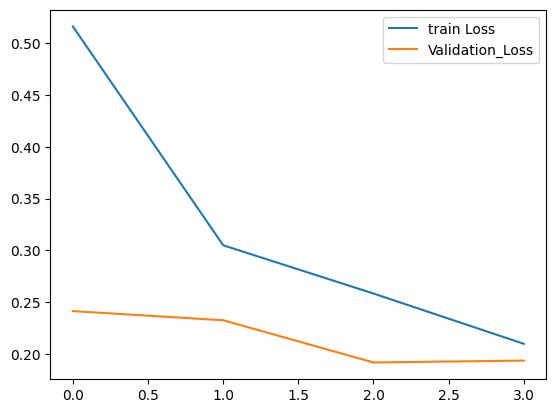

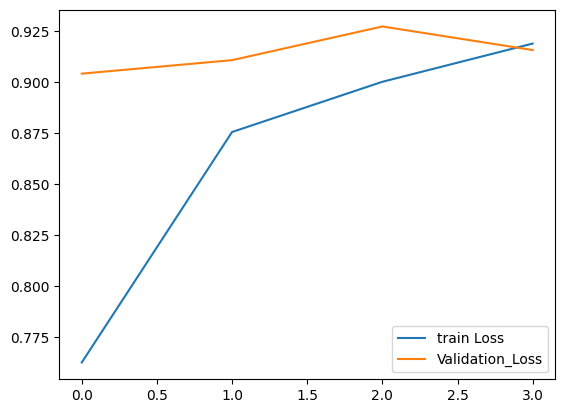

In [ ]:
h = history

## Plot the Loss Value

plt.plot(h.history["loss"],label = "train Loss")
plt.plot(h.history["val_loss"],label = "Validation_Loss")
plt.legend()
plt.show()


## Plot the Accuracy Value

plt.plot(h.history["acc"],label = "train Loss")
plt.plot(h.history["val_acc"],label = "Validation_Loss")
plt.legend()
plt.show()

Predictive System

Path of the Images to be Predicated:/content/images.jpeg


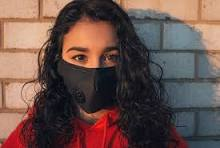

1/1 [==============================] - 0s 129ms/step
[[0.5857555 0.3900732]]
0
The Person is Not Wearing the Mask:


In [ ]:
input_image_path = input("Path of the Images to be Predicated:")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_predication = model.predict(input_image_reshaped)

print(input_predication)

input_pred_label = np.argmax(input_predication)

print(input_pred_label)

if input_pred_label == 1:
  print("The person is Wearing The Mask:")

else:
  print("The Person is Not Wearing the Mask:")